# Лабораторная работа №4 (Ким Д.В., группа БПМ-151)

### Вариант 13

Найти с точностью $\varepsilon = 10^{-6}$ все корни системы нелинейных уравнений <br/>
$\begin{equation}
\begin{cases}
f_1(x_1,x_2) = 0 
\\
f_2(x_1,x_2) = 0
\end{cases}
\end{equation}$ <br/>
используя метод Ньютона для системы нелинейных уравнений. <br/> Найти корни с помощью встроенного блока решения уравнений *numpy*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from scipy.optimize import fsolve
from scipy.misc import derivative
from numpy import linalg as lnl

Система уравнений, с которой будем работать: <br/>
$\begin{equation}
\begin{cases}
\tan(x_1 x_2+0.4)-x_{1}^{2}=0
\\
0.6 x_{1}^{2}+2x_{2}^{2}-1=0
\end{cases}
\end{equation}$

In [2]:
def eqs(x):
    x1, x2 = x[0], x[1]
    return np.array([np.tan(x1*x2+0.4)-x1**2, 0.6*x1**2+2*x2**2-1])

#### Локализуем корни системы уравнений
Приведём уравнения к виду: <br/>
$\begin{equation}
\begin{cases}
x_2 = \frac{\arctan{x_{1}^{2}-0.4}}{x_1}
\\ 
x_2 = \sqrt{\frac{1-0.6x_{1}^{2}}{2}}
\end{cases}
\end{equation}$
и изобразим графически.

In [3]:
def g1(x1):
    return (np.arctan(x1**2)-0.4)/x1 
def g2(x1):
    return np.sqrt((1-0.6*x1**2)/2)

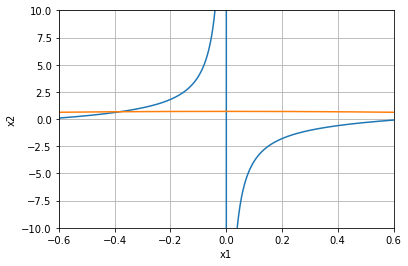

In [4]:
X = np.arange(-np.sqrt(1/2), np.sqrt(1/2), 1e-3)
Y1 = g1(X)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(X, Y1)
Y2 = g2(X)
plt.plot(X, Y2)
plt.grid(True)
plt.axis([-0.6, 0.6, -10, 10])
plt.show()

Видим, что решение системы локализовано в прямоугольнике $[-0.4,-0.2]\times[0,2.5]$

Определим вспомогательные функции *partial_derivative* и *Jacobian*: нам понадобятся частные производные и якобиан в методе Ньютона.

In [5]:
def partial_derivative(fun, f_num=0, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x 
        return fun(args)[f_num]
    return derivative(wraps, point[var], dx = 1e-6)

def Jacobian(f, x, n=2):
    jacob = np.zeros((2, 2))
    for i in range(n):
        for j in range(n):
            jacob[i, j] = partial_derivative(f, i, j, x)
    return jacob

In [6]:
def nonlin_newton(F, J, x, norm, eps):
    count = 0
    itp = np.array(x)
    while np.abs(lnl.norm(F(x), ord=norm)) > eps and count < 100:
        delta = lnl.solve(J(F, x), -1*F(x))
        x = x + delta
        itp = np.vstack((itp, x))
        count += 1
    return x, count, itp

In [7]:
x_2, n_2, itp_2 = nonlin_newton(eqs, Jacobian, x=[-0.2, 2.5], norm=2, eps=1e-6)

In [8]:
print('2-норма, Корни - [{:.7e}, {:.7e}], Число итераций - {:d}'.format(x_2[0], x_2[1], n_2))

2-норма, Корни - [-3.7984840e-01, 6.7580667e-01], Число итераций - 5


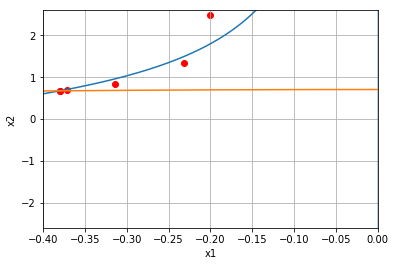

In [9]:
X = np.arange(-np.sqrt(1/2), np.sqrt(1/2), 1e-3)
Y1 = g1(X)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(X, Y1)
plt.scatter(itp_2[:,0], itp_2[:,1], c='r')
Y2 = g2(X)
plt.plot(X, Y2)
plt.grid(True)
plt.axis([-0.4, 0.0, -2.6, 2.6])
plt.show()

In [10]:
x_inf, n_inf, itp_inf = nonlin_newton(eqs, Jacobian, x=[-0.2, 0], norm=np.inf, eps=1e-6)

In [11]:
print('inf-норма, Корни - [{:.7e}, {:.7e}], Число итераций - {:d}'.format(x_inf[0], x_inf[1], n_inf))

inf-норма, Корни - [3.7984846e-01, -6.7580659e-01], Число итераций - 16


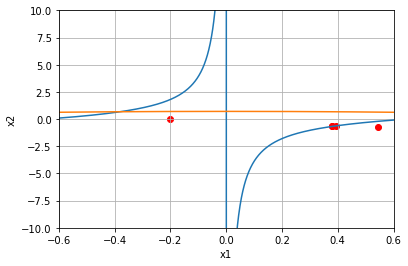

In [12]:
X = np.arange(-np.sqrt(1/2), np.sqrt(1/2), 1e-3)
Y1 = g1(X)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(X, Y1)
plt.scatter(itp_inf[:,0], itp_inf[:,1], c='r')
Y2 = g2(X)
plt.plot(X, Y2)
plt.grid(True)
plt.axis([-0.6, 0.6, -10, 10])
plt.show()

In [13]:
x, y = fsolve(eqs, [-0.2, 0])

print('Корни - [{:.7e}, {:.7e}]'.format(x, y))
print('Норма ошибки с 2-нормой:', lnl.norm([x, y] - x_2, ord=np.inf))
print('Норма ошибки с inf-нормой:', lnl.norm([x, y] - x_inf, ord=2))

Корни - [-3.7984844e-01, 6.7580659e-01]
Норма ошибки с 2-нормой: 8.39069755897981e-08
Норма ошибки с inf-нормой: 1.5504830188523928


Ошибка на несколько порядков меньше $\varepsilon=10^{-6}$. <br/>
Все классно.